In [1]:
import pandas as pd
import numpy as np 

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ingeniero\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
equinix = pd.read_csv('EQIX_data.csv')
fbook = pd.read_csv('FB_data.csv')



In [6]:
data = fbook.merge(equinix, on='Date', how = 'inner')
data

,Date,Open_x,High_x,Low_x,Close_x,Volume_x,Name_x,Open_y,High_y,Low_y,Close_y,Volume_y,Name_y
0,2015-01-26,77.98,78.47,77.29,77.50,19260820,FB,233.60,233.60,226.97,229.41,385511,EQIX
1,2015-01-27,76.71,76.88,75.63,75.78,20109977,FB,226.06,229.40,221.59,221.90,486596,EQIX
2,2015-01-28,76.90,77.64,76.00,76.24,53306422,FB,222.80,223.15,215.08,217.10,804750,EQIX
3,2015-01-29,76.85,78.02,74.21,78.00,61293468,FB,216.83,222.54,216.61,221.92,432096,EQIX
4,2015-01-30,78.00,78.16,75.75,75.91,42649491,FB,219.09,220.97,216.53,216.86,389585,EQIX
5,2015-02-02,76.11,76.14,73.75,74.99,41955258,FB,218.05,219.98,213.89,218.00,680997,EQIX
6,2015-02-03,75.19,75.58,73.86,75.40,26957714,FB,219.68,223.72,218.50,223.60,556209,EQIX
7,2015-02-04,75.09,76.35,75.01,75.63,20277368,FB,221.43,224.25,221.39,222.12,421332,EQIX
8,2015-02-05,75.71,75.98,75.21,75.62,15062573,FB,223.51,226.24,220.12,225.80,486450,EQIX
9,2015-02-06,75.68,75.70,74.25,74.47,21210994,FB,226.95,226.95,218.33,219.43,440601,EQIX


<b>Simple Regression</b>

In [7]:
data[['Open_x','Close_y']]

,Open_x,Close_y
0,77.98,229.41
1,76.71,221.90
2,76.90,217.10
3,76.85,221.92
4,78.00,216.86
5,76.11,218.00
6,75.19,223.60
7,75.09,222.12
8,75.71,225.80
9,75.68,219.43


In [9]:
X = data['Open_x']

In [10]:
Y = data['Close_y']

In [11]:
X

0       77.98
1       76.71
2       76.90
3       76.85
4       78.00
5       76.11
6       75.19
7       75.09
8       75.71
9       75.68
10      74.05
11      74.85
12      75.09
13      76.86
14      76.46
15      75.30
16      75.94
17      76.99
18      79.55
19      79.96
20      78.50
21      78.50
22      79.88
23      80.68
24      79.00
25      79.61
26      79.30
27      81.23
28      80.90
29      79.68
        ...  
613    151.90
614    151.72
615    149.00
616    149.03
617    149.25
618    151.69
619    153.37
620    156.49
621    158.74
622    160.13
623    160.25
624    159.66
625    163.59
626    164.80
627    164.16
628    164.64
629    165.01
630    166.01
631    174.70
632    169.07
633    172.00
634    169.82
635    170.30
636    169.30
637    168.97
638    169.95
639    171.88
640    169.98
641    170.06
642    167.95
Name: Open_x, Length: 643, dtype: float64

In [12]:
Y

0      229.41
1      221.90
2      217.10
3      221.92
4      216.86
5      218.00
6      223.60
7      222.12
8      225.80
9      219.43
10     217.30
11     219.82
12     221.07
13     227.74
14     227.70
15     225.18
16     228.91
17     229.41
18     235.38
19     232.96
20     232.17
21     228.39
22     226.40
23     224.18
24     223.64
25     221.12
26     223.83
27     234.30
28     235.52
29     231.25
        ...  
613    429.16
614    422.76
615    424.08
616    418.43
617    423.30
618    427.08
619    431.04
620    437.11
621    436.24
622    437.70
623    435.48
624    438.28
625    440.50
626    441.21
627    441.44
628    441.60
629    436.96
630    440.04
631    442.87
632    447.90
633    450.73
634    453.08
635    455.47
636    449.36
637    445.58
638    444.23
639    441.53
640    447.81
641    439.48
642    438.39
Name: Close_y, Length: 643, dtype: float64

<function matplotlib.pyplot.show>

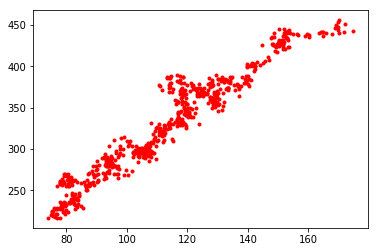

In [13]:
plt.scatter(X,Y, c='r' ,marker= '.')
plt.show

In [14]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

In [15]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Close_y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     8785.
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:47:41   Log-Likelihood:                -2701.5
No. Observations:                 643   AIC:                             5407.
Df Residuals:                     641   BIC:                             5416.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.0337      3.120     14.111      0.000      37.906      50.161
Open_x         2.5190      0.027     93.727      0.000       2.466       2.572
==============================================================================
Omnibus:                       87.923   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.017
Skew:                           0.912   Prob(JB):                     7.92e-30
Kurtosis:                       4.294   Cond. No.                         568.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
slope, intercept, r_value, p_value , std_err = stats.linregress(X,Y)

In [17]:
slope

2.5190172228594045

In [18]:
intercept

44.033717564951303

In [19]:
r_value

0.96539855818744968

In [20]:
r_value**2

0.9319943761504067

In [21]:
p_value

0.0

In [22]:
std_err

0.02687620163683372

<b> Multivariate </b> 

In [29]:
amazon = pd.read_csv('AMZN_data.csv')
wti = pd.read_csv('wti.csv')
sp500 = pd.read_csv('sp500.csv')
interes = pd.read_csv('Int_rate.csv')

In [30]:
data2 = wti.merge(amazon, on='Date', how = 'inner').merge(sp500, on='Date', how = 'inner').merge(interes, on='Date', how = 'inner')
data2

,Date,Close_x,Open_x,High_x,Low_x,Open_y,High_y,Low_y,Close_y,Volume,Name,Close,Open,High,Low,federal_funds
0,2012-08-13,92.73,93.25,94.14,92.05,232.23,234.37,231.00,232.44,1997421,AMZN,1404.11,1405.87,1405.87,1397.32,0.13
1,2012-08-14,93.43,92.71,93.92,92.56,234.71,236.72,232.62,233.19,2750998,AMZN,1403.93,1404.36,1410.03,1400.60,0.13
2,2012-08-15,94.33,93.25,94.90,92.68,232.26,238.14,232.25,237.42,3266819,AMZN,1405.53,1403.89,1407.73,1401.83,0.13
3,2012-08-16,95.60,94.21,95.75,93.93,237.72,242.82,236.20,241.55,4312712,AMZN,1415.51,1406.61,1417.44,1404.15,0.13
4,2012-08-17,96.01,95.23,96.28,94.98,240.60,243.35,240.47,241.17,3085900,AMZN,1418.16,1415.84,1418.71,1414.67,0.13
5,2012-08-20,95.97,96.36,96.53,95.02,241.37,241.65,238.20,240.35,1889992,AMZN,1418.13,1417.85,1418.13,1412.12,0.13
6,2012-08-21,96.68,95.97,97.60,95.81,240.88,243.85,238.55,239.45,2571911,AMZN,1413.17,1418.13,1426.68,1410.86,0.13
7,2012-08-22,97.26,96.94,97.54,96.26,239.40,244.90,238.80,243.10,2473886,AMZN,1413.49,1413.09,1416.12,1406.78,0.13
8,2012-08-23,96.27,97.30,98.29,95.75,242.14,243.48,239.02,241.20,2454445,AMZN,1402.08,1413.49,1413.49,1400.50,0.13
9,2012-08-24,96.15,96.06,97.17,95.41,241.68,246.87,241.36,245.74,3699397,AMZN,1411.13,1401.99,1413.46,1398.04,0.13


In [31]:
X = data2[['Close_x','Close','federal_funds']]
Y = data2['Close_y']

In [34]:
XX1 = sm.add_constant(X)
reg2 = sm.OLS(Y,XX1).fit()

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Close_y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     3515.
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:05:50   Log-Likelihood:                -7218.8
No. Observations:                1258   AIC:                         1.445e+04
Df Residuals:                    1254   BIC:                         1.447e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.0481     28.923      0.520      0.603     -41.695      71.792
Close_x          -2.0852      0.119    -17.487      0.000      -2.319      -1.851
Close             0.2568      0.013     20.531      0.000       0.232       0.281
federal_funds   461.2456     10.713     43.054      0.000     440.228     482.263
==============================================================================
Omnibus:                        1.738   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.634
Skew:                          -0.056   Prob(JB):                        0.442
Kurtosis:                       3.137   Cond. No.                     2.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
X = data2[['Close_x','federal_funds']]
Y = data2['Close_y']

In [43]:
XX1 = sm.add_constant(X)
reg2 = sm.OLS(Y,XX1).fit()

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Close_y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3791.
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:07:30   Log-Likelihood:                -7401.0
No. Observations:                1258   AIC:                         1.481e+04
Df Residuals:                    1255   BIC:                         1.482e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           580.8486     10.145     57.253      0.000     560.945     600.752
Close_x          -3.4379      0.115    -29.937      0.000      -3.663      -3.213
federal_funds   569.8085     10.766     52.929      0.000     548.688     590.929
==============================================================================
Omnibus:                       57.246   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.153
Skew:                          -0.036   Prob(JB):                     5.69e-06
Kurtosis:                       2.325   Cond. No.                         413.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""